# Titanic Dataset

In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load Dataset
df = sns.load_dataset("titanic")

In [3]:
# Initial inspection
print(df.head())
print(df.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

### Data Cleaning

In [4]:
# Checking for null values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
# Drop high-missing-value columns
df.drop(["deck", "embark_town"], axis=1, inplace=True)

In [6]:
# Drop rows where age is missing (or impute if preferred)
df.dropna(subset=["age"], inplace=True)

### Univariate Analysis

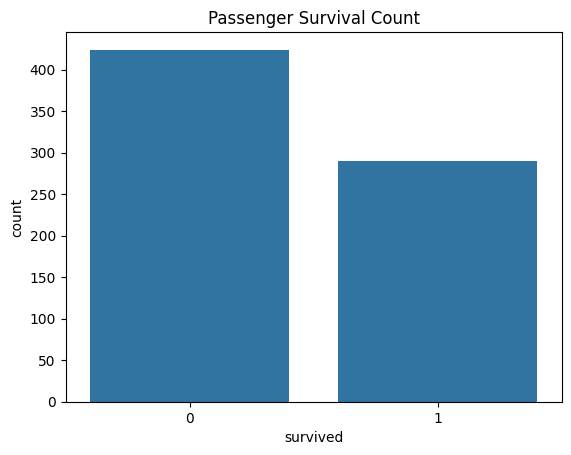

In [7]:
# 1. Survival Distribution

sns.countplot(x="survived", data=df)
plt.title("Passenger Survival Count")
plt.show()

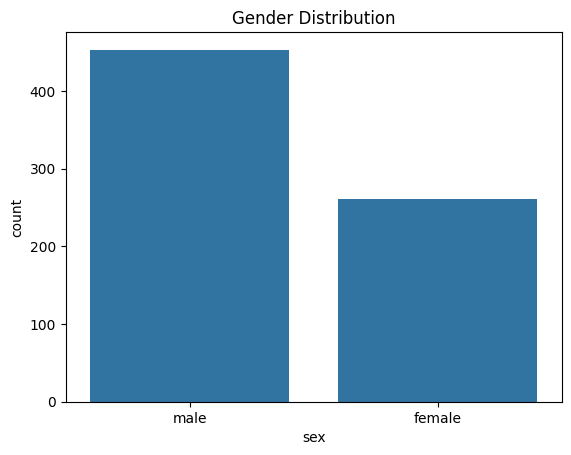

In [8]:
 # 2. Gender Distribution

sns.countplot(x="sex", data=df)
plt.title("Gender Distribution")
plt.show()

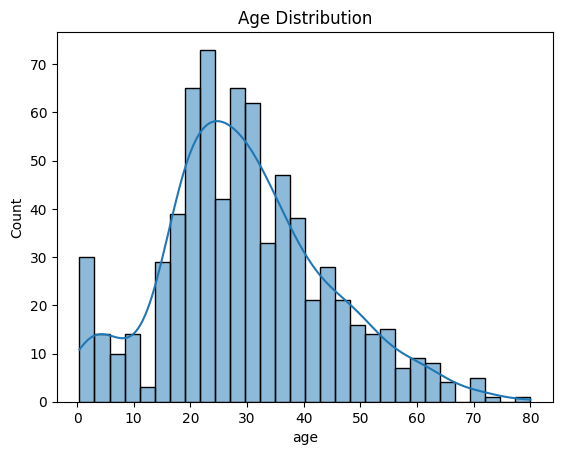

In [9]:
# 3. Age Distribution

sns.histplot(x="age", kde=True, bins=30, data=df)
plt.title("Age Distribution")
plt.show()

### Bivariate Analysis

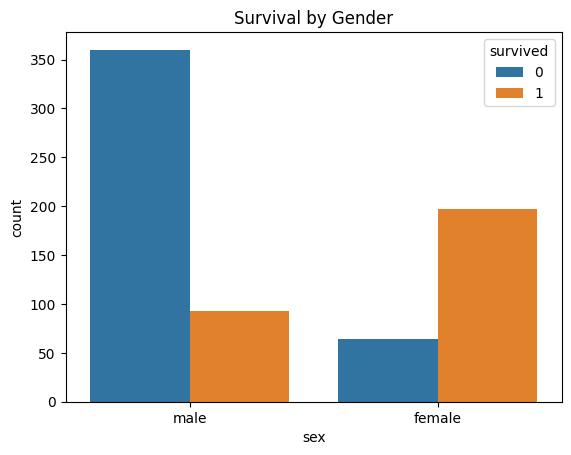

In [10]:
# 1. Survival by Gender

sns.countplot(x="sex", hue="survived", data=df)
plt.title("Survival by Gender")
plt.show()

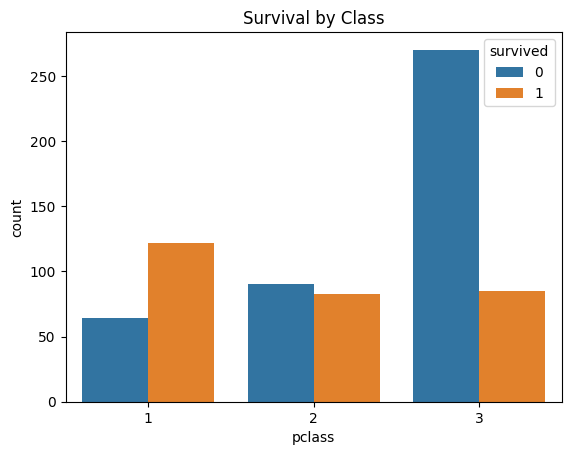

In [11]:
# 2. Survival by Passenger Class

sns.countplot(x="pclass", hue="survived", data=df)
plt.title("Survival by Class")
plt.show()

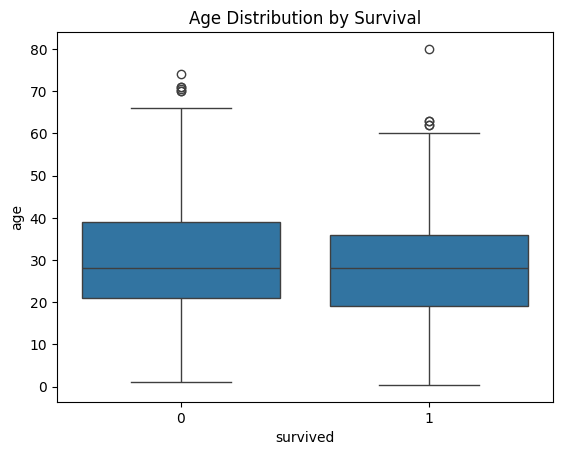

In [12]:
# 3. Survival vs Age

sns.boxplot(x="survived", y="age", data=df)
plt.title("Age Distribution by Survival")
plt.show()

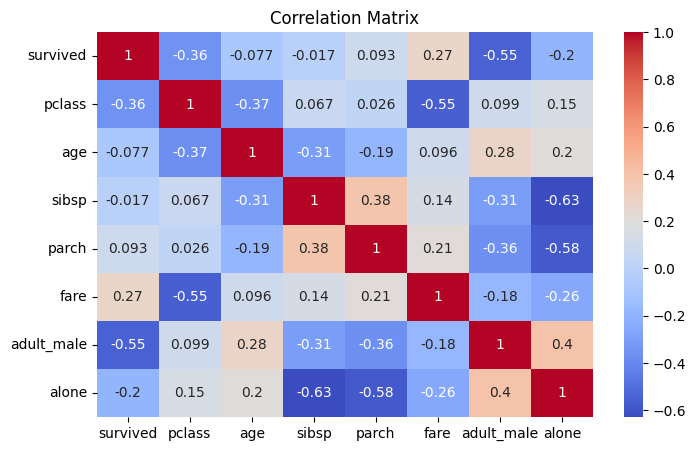

In [13]:
# 4. Correlation Heatmap

plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [14]:
# Crosstab: Gender vs Survival Rates

ct = pd.crosstab(df["sex"], df["survived"], normalize="index") * 100

print(ct)

survived          0          1
sex                           
female    24.521073  75.478927
male      79.470199  20.529801


In [15]:
# Grouped Survival Rate by Class

print(df.groupby("pclass")["survived"].mean())

pclass
1    0.655914
2    0.479769
3    0.239437
Name: survived, dtype: float64


### Summary

Survival Rate: About 38% of passengers survived, 62% perished.

Gender Matters:
73% of women survived,
Only 19% of men survived,
Clearly, women were prioritized during evacuation.

Class Inequality:
63% of first-class passengers survived,
Only 24% of third-class passengers survived,
Access to lifeboats was highly skewed toward the wealthy.

Age Factor:
Children had better survival rates,
The elderly were less likely to survive.

Fare & Wealth:
Passengers who paid higher fares had higher survival chances.


